# Sequence Labelling Exercises
In these exercises you will work with **part-of-speech tagging,** a classic example of a sequence labelling task for NLP.  We will use the examples from the slides and build upon them.

## <font color='green'>Setup 1</font>: Load Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %cd .. 
import sys, os
_snlp_book_dir = ".."
sys.path.append(_snlp_book_dir)
from collections import defaultdict
import statnlpbook.util as util
import statnlpbook.sequence as seq
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

## <font color='green'>Setup 2</font>: Load Data

In [2]:
train = seq.load_tweebank("../data/oct27.splits/oct27.train")
dev = seq.load_tweebank("../data/oct27.splits/oct27.dev")

## <font color='blue'>Task 1</font>: Ambiguity

We have established that POS tagging is a **disambiguation** task, since identical words can have different POS tags based on their context.  In this exercise, you are tasked with finding some of these ambiguities in the Tweebank corpus.

1. Count the POS tags associated with each word (in the training set), and find the top 10 words that occur with the highest number of different POS tags.
2. Pick one of these words and extract a concrete example of that word for each of its POS tags.
   + Can you follow why different POS tags are used for these different occurrences?
   + *Bonus:* What information do you think a machine learning algorithm would need to choose the correct POS tags in these instances?

**Reminder:** You can find a description of all POS tags in the [Tweebank Annotation Guidelines](http://www.cs.cmu.edu/~ark/TweetNLP/annot_guidelines.pdf).

In [3]:
words = defaultdict(set)

for x, y in train:
    for x_i, y_i in zip(x, y):
        # x_i is a token, y_i is its POS tag
        pass

ambiguity_table = pd.DataFrame([], columns=['Word','Tags'])
ambiguity_table[:10]

,Word,Tags


In [4]:
# Find concrete examples for word 'w' with a given tag 't'
seq.find_tag_contexts(train, lambda w, t: w == 'Senate' and t == '^')

[(('in', 'Louisiana', 'Senate', 'race'), ('P', '^', '^', 'N'))]

## <font color='blue'>Task 2</font>: Features for POS tagging

Our `LocalSequenceLabeler` needs a feature function.  We have seen that adding features that signal whether a word starts with "@" or with a lowercase character can improve POS tagging accuracy.  We have also looked at ways to analyze our tagger's mistakes, such as plotting a confusion matrix.

In this exercise, your task is to add more features to improve the tagger's performance even further.

Look at the confusion matrix, or at some concrete mistakes that the tagger currently makes, and try to come up with new features that improve the accuracy on the dev set!

0.771511507360564

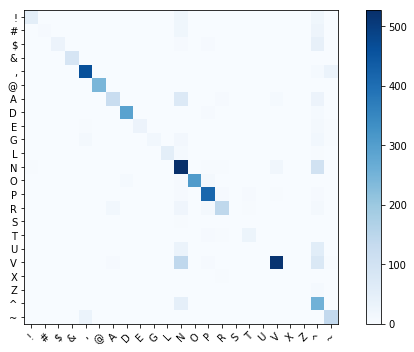

In [5]:
def feat_3(x,i):
    return {
        'bias':1.0,  
        'word:' + x[i]: 1.0,
        'first_at:' + str(x[i][0:1] == '@'): 1.0,
        'is_lower:' + str(x[i].islower()): 1.0
    }
def your_feats(x,i):
    return {
        **feat_3(x,i),
        # TODO
    }
local = seq.LocalSequenceLabeler(your_feats, train)

seq.plot_confusion_matrix(dev, local.predict(dev))
seq.accuracy(dev, local.predict(dev))

In [6]:
# Optionally: Look at some example mistakes for inspiration
util.Carousel(local.errors(dev[10:20], 
                           filter_guess=lambda y: y=='N',
                           filter_gold=lambda y: y=='^'))